# Session 1: Geometric Objects
*Written by Men Vuthy, 2021*

---

### Overview:

In this session, we will learn the most fundamental geometric objects (i.e. Points, Lines and Polygons) which are important vector elements in spatial data analysis. In order to read or write these objects in Python, we use a package called [Shapely](https://shapely.readthedocs.io/en/stable/manual.html). Shapely is a Python package for the manipulation and analysis of two-dimensional geospatial geometries.

Let's learn how to create Point, Line and Polygon with Shapely module by passing coordinates (x, y [, z]) into `Point()`, `LineString()`, and `Polygon()`

**1. Point**

Creating point is easy, you just pass x and y coordinates into `Point()` -object as follows:

In [1]:
# Import shapely module for Point
from shapely.geometry import Point

Now we can see how each point looks like:

In [2]:
# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)
point4 = Point(10.26, -3.456)

To check the information of each point, we use the `Print()` statement as follows:

In [3]:
print(point1)
print(point3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


When passing 3-dimension point, it will result in letter `Z` in front of object definition. 

So let's check the type of a point

In [4]:
type(point1)

shapely.geometry.point.Point

We can check the geometry type of the object by using `Point.geom_type`:

In [5]:
point1.geom_type

'Point'

**Point attributes and functions**

In shapely Point, there are some useful built-in attributes and fuctions for data analysis such as the fuction to extract coordinates x or y, and the fuction to calculate Euclidian distance between two points.

There are few ways to extract the coordinates of a Point:

In [6]:
# Get xy coordinate tuple
list(point1.coords)

[(2.2, 4.2)]

In a list, there are tuples which can be extracted by using the attributes `x` and `y`.

In [7]:
# Read x and y coordinates separately
x = point1.x
y = point1.y
print(x)
print(y)
print( x, y)

2.2
4.2
2.2 4.2


Let's step into calculating distance between two points based on the cartesian coordinate system. When working with real GIS data, determine the coordinate reference system (CRS) is very important. Besides, you should always check the unit of measurement (Ex: meters) in the CRS you're using.

To calculate the distance between 2 points or objects, we use `.distance` method in Shapely. Let's calculate distance between point3 and point 4:

In [8]:
# Check input data
print(point3)
print(point4)

POINT (9.26 -2.456)
POINT (10.26 -3.456)


In [9]:
# Calculate the distance between point3 and point4
dist = point3.distance(point4)

# Print out result
print("Distance between the points is {0:.3f} units (m or km).".format(dist))

Distance between the points is 1.414 units (m or km).


---

**2.LineString**

So far you know how to create Point and check its geometric information. Now, let's create LingString by using `LineString()` statement as follows:

In [10]:
# Import shapely module for LineString
from shapely.geometry import LineString

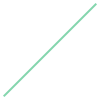

In [11]:
# Create linestring from two points with tuple
line = LineString([(0, 0), (1, 1)])
line

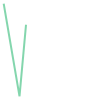

In [12]:
# Create linestring using more than 2 points from Point objects we defined above.
line_ptobj = LineString([point1, point2, point3]) # Point object
line_tuple = LineString([(2.2, 4.2),  (7.2, -25.1), (9.26, -2.456)])

line_ptobj

In [13]:
# Check if lines are identical
line_ptobj == line_tuple 

True

In [14]:
print(line_ptobj)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


We can see that LingString is a combination of multiple points' coordinate.

Let's then check the type of geometry.

In [15]:
type(line_ptobj)

shapely.geometry.linestring.LineString

In [16]:
line_ptobj.geom_type

'LineString'

**LineString attributes and functions**

In shapely LineString, there are also some useful built-in attributes and fuctions. With these fuctions, we can calculate length or centroid, buffer the line, create points along the line at specific distance, calculate the distance from points, etc. Check more fuctions and attributes in [Shapely document](https://shapely.readthedocs.io/en/stable/manual.html)

In [17]:
# Get x and y coordinates of the line
list(line.coords)

[(0.0, 0.0), (1.0, 1.0)]

In [18]:
# Get length of the line
length = line.length

print("Length of our line: {0:.2f} units".format(length))

Length of our line: 1.41 units


In [19]:
# Get x-y bounding box is a (minx, miny, maxx, maxy) tuple
line.bounds

(0.0, 0.0, 1.0, 1.0)

In [20]:
# Get the centroid of the line
print(line.centroid)

POINT (0.5 0.5)


Notice: the centroid of the line is a Shapely Point object.

---

**3. Polygon**

Creating a `Polygon` object is not so different from creating `Point` and `LineString` object; however, it takes the input as a sequence of coordinates.

We can create a polygon by using `Polygon()` as follows:

In [21]:
# Import shapely module for Polygon
from shapely.geometry import Polygon

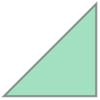

In [22]:
# Create a Polygon from the coordinates
polygon = Polygon([(0, 0), (1, 1), (1, 0)])
polygon

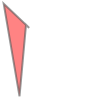

In [23]:
# Create a Polygon from the points we created above
polygon2 = Polygon([(pt.x, pt.y) for pt in (point1, point2, point3, point4)])
polygon2

In [24]:
# Let's see what just happened in the point list
[(pt.x, pt.y) for pt in (point1, point2, point3, point4)]

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456), (10.26, -3.456)]

In [25]:
# Let's see the geometric type when we print it
print(polygon2)
print(type(polygon2))
print(polygon2.geom_type)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 10.26 -3.456, 2.2 4.2))
<class 'shapely.geometry.polygon.Polygon'>
Polygon


We can also create a polygon with a hole. 
So, let's learn how to create this kind of polygon with `Polygon(shell, holes)`. The type of
`shell` and `holes` should be a list of points.

In [26]:
# Define exterior boundary (shell) and interior boundary (holes)
shell = [(0, 0), (0, 2), (2, 2), (2, 0)]
hole = [[(1, 0), (0.5, 0.5), (1, 1), (1.5, 0.5)]]

# Create polygon with holes
polygon = Polygon(shell, hole) # or Polygon(shell = shell, holes = hole)

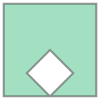

In [27]:
# Let's see how polygon looks like
polygon

In [28]:
# Check the type of shell and holes
print(type(shell))
print(type(hole))

<class 'list'>
<class 'list'>


**Polygon attributes and functions**

We can again access different attributes directly from the Polygon object itself that can be really useful for many analyses, such as area, centroid, bounding box, exterior, and exterior-length. 

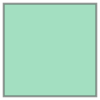

In [29]:
# Define polygon again
polygon = Polygon(shell)
polygon

In [30]:
# Print the outputs
print("Polygon centroid: ", polygon.centroid)
print("Polygon Area: ",  polygon.area)
print("Polygon Bounding Box: ", polygon.bounds)
print("Polygon Exterior: ", polygon.exterior)
print("Polygon Exterior Length: ", polygon.exterior.length)

Polygon centroid:  POINT (1 1)
Polygon Area:  4.0
Polygon Bounding Box:  (0.0, 0.0, 2.0, 2.0)
Polygon Exterior:  LINEARRING (0 0, 0 2, 2 2, 2 0, 0 0)
Polygon Exterior Length:  8.0


Now we see that it is easy to access the polygon's attributes with the method above. See a full list of methods in the [Shapely User Manual](https://shapely.readthedocs.io/en/stable/manual.html).

---

### Exercises

Plot these shapes using Shapely with the given coordinates:

1. Create Point: (31.91, 0.62), and extract `x` and `y` coordinates
2. Create Line: (31.18, -1.63), (28.82, -1.63), (28.09, 0.62), and calculate the length of line.
3. Create Polygon: (30, 2.01), (31.91, 0.62), (31.18, -1.63), (28.82, -1.63), (28.09, 0.62), and calculate the polygon area.

---

**4. Geometry collections**

In real practice, you will need to store multiplt points, linestrings, or polygons in a collection.
Therefore, it is important to know how to create or analyze more than a single feature using Shapely. 

In Shapely:
* collections of points are created by using a MultiPoint -object
* collections of lines by using a MultiLineString -object
* and collections of polygon by a MultiPolygon -object.

In [31]:
# Import module for creating geometry collections
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

In [32]:
# Create a MultiPoint object of our points 1,2,3 and 4
multi_point = MultiPoint([point1, point2, point3, point4])

# It is also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456), (7.2, -2.456)])

MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456, 10.26 -3.456)


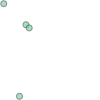

In [33]:
# Print object definitions
print(multi_point)
multi_point

In [34]:
# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
line3 = LineString([point3, point4])
multi_line = MultiLineString([line1, line2, line3])

MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456), (9.26 -2.456, 10.26 -3.456))


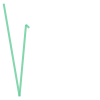

In [35]:
# Print object definitions
print(multi_line)
multi_line

In [36]:

# Circle (using a buffer around a point)
point = Point((0,1))
circle = point.buffer(1)

# Triangle
triangle = Polygon([(10,0), (12,4), (14,0)])

# square
square = Polygon([(2,0), (2,6), (8,6), (8,0)])

multi_poly = MultiPolygon([circle, square, triangle])

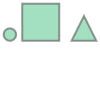

In [37]:
# Print object definitions
multi_poly

**Some useful attributes for geometry collection:**

In [38]:
# Attributes for number of objects and length
print("Number of objects in our MultiPoints:", len(multi_point))
print("Number of objects in our MultiLine:", len(multi_line))
print("Number of objects in our MultiPolygon:", len(multi_poly))

Number of objects in our MultiPoints: 4
Number of objects in our MultiLine: 3
Number of objects in our MultiPolygon: 3


In [39]:
# Attributes for number of objects and length
print("Length of objects in our MultiLineString", (multi_line.length))

Length of objects in our MultiLineString 53.87528269176866


In [40]:
# Attributes for area
print("Area of our MultiPolygon:", multi_poly.area)
print("Area of our circle:", multi_poly[0].area)

Area of our MultiPolygon: 47.13654849054594
Area of our circle: 3.1365484905459384


---